# SVM Classification Practice

[Support Vector Classification Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)

[Documentation on SVM Kernel Parameters](https://scikit-learn.org/stable/modules/svm.html#svm-kernels)

[Test Data Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html)



In [1]:
# Create the raw data
from sklearn.datasets import make_classification
raw_data = make_classification(n_samples=10000)

features = raw_data[0]
labels = raw_data[1]

In [2]:
# Split the raw data into training and test sets
from sklearn.model_selection import train_test_split

""" 
random_state sets the seed for randomization of training data. If this is
omitted, the training data will be different each time, making tuning more
difficult 
"""

train, test, train_labels, test_labels = train_test_split(
    features, 
    labels, 
    test_size=.2, # using 40% of the data for testing and 60% for training
    random_state=42 
)

In [15]:
"""
This cell creates two models, one using the SVC class, another using the 
BaggingClassifier class. 
"""
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier

svc_options = {
    "kernel": "rbf",
    "C": 3,
    "gamma": 0.1
}

def svc_factory(**kwargs):
    return SVC(**kwargs)

single_model = svc_factory(**svc_options)
single_model.fit(train, train_labels)
single_prediction = model.predict(test)

bagged_model = BaggingClassifier(
    svc_factory(**svc_options),
    max_samples=0.7,
    max_features=0.7
)
bagged_model.fit(train, train_labels)
bagged_prediction = bagged_model.predict(test)

# show performance of the single model
print(classification_report(test_labels, single_prediction))
print(confusion_matrix(test_labels, single_prediction))

# show performance of the ensemble model
print(classification_report(test_labels, bagged_prediction))
print(confusion_matrix(test_labels, bagged_prediction))

              precision    recall  f1-score   support

           0       0.90      0.95      0.93       995
           1       0.95      0.90      0.92      1005

    accuracy                           0.92      2000
   macro avg       0.93      0.92      0.92      2000
weighted avg       0.93      0.92      0.92      2000

[[945  50]
 [101 904]]
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       995
           1       0.96      0.90      0.93      1005

    accuracy                           0.93      2000
   macro avg       0.93      0.93      0.93      2000
weighted avg       0.93      0.93      0.93      2000

[[961  34]
 [103 902]]


In [5]:
# another way to show performance by running the model
from sklearn.model_selection import cross_val_score

accuracy = cross_val_score(
    model,
    test,
    test_labels,
    scoring="accuracy"
)
print(accuracy)

[0.92   0.89   0.895  0.925  0.8875]


In [6]:
# print the classification report
from sklearn.metrics import classification_report



              precision    recall  f1-score   support

           0       0.90      0.95      0.93       995
           1       0.95      0.90      0.92      1005

    accuracy                           0.92      2000
   macro avg       0.93      0.92      0.92      2000
weighted avg       0.93      0.92      0.92      2000



In [7]:
# create the confusion matrix
from sklearn.metrics import confusion_matrix
c_matrix = confusion_matrix(test_labels, prediction)
print(c_matrix)
sum(sum(c_matrix)) # this is the sum of all test data

[[945  50]
 [101 904]]


2000

              precision    recall  f1-score   support

           0       0.89      0.95      0.92       995
           1       0.95      0.88      0.91      1005

    accuracy                           0.92      2000
   macro avg       0.92      0.92      0.92      2000
weighted avg       0.92      0.92      0.92      2000

[[947  48]
 [117 888]]


 
random_state sets the seed for randomization of training data. If this is
omitted, the training data will be different each time, making tuning more
difficult 



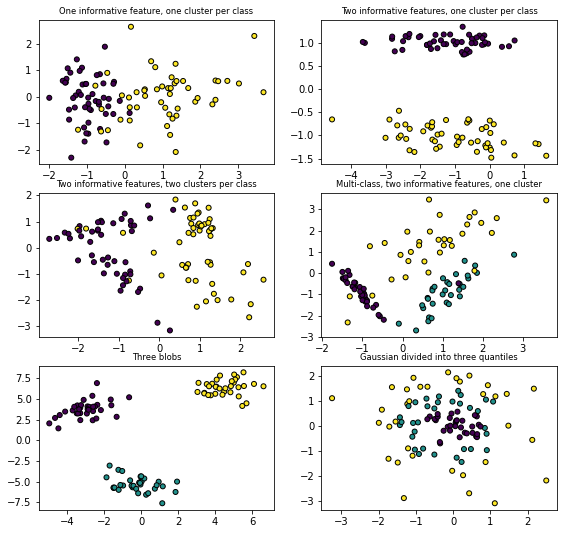

In [9]:
print(__doc__)

import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from sklearn.datasets import make_gaussian_quantiles

plt.figure(figsize=(8, 8))
plt.subplots_adjust(bottom=.05, top=.9, left=.05, right=.95)

plt.subplot(321)
plt.title("One informative feature, one cluster per class", fontsize='small')
X1, Y1 = make_classification(n_features=2, n_redundant=0, n_informative=1,
                             n_clusters_per_class=1)
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,
            s=25, edgecolor='k')

plt.subplot(322)
plt.title("Two informative features, one cluster per class", fontsize='small')
X1, Y1 = make_classification(n_features=2, n_redundant=0, n_informative=2,
                             n_clusters_per_class=1)
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,
            s=25, edgecolor='k')

plt.subplot(323)
plt.title("Two informative features, two clusters per class",
          fontsize='small')
X2, Y2 = make_classification(n_features=2, n_redundant=0, n_informative=2)
plt.scatter(X2[:, 0], X2[:, 1], marker='o', c=Y2,
            s=25, edgecolor='k')

plt.subplot(324)
plt.title("Multi-class, two informative features, one cluster",
          fontsize='small')
X1, Y1 = make_classification(n_features=2, n_redundant=0, n_informative=2,
                             n_clusters_per_class=1, n_classes=3)
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,
            s=25, edgecolor='k')

plt.subplot(325)
plt.title("Three blobs", fontsize='small')
X1, Y1 = make_blobs(n_features=2, centers=3)
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,
            s=25, edgecolor='k')

plt.subplot(326)
plt.title("Gaussian divided into three quantiles", fontsize='small')
X1, Y1 = make_gaussian_quantiles(n_features=2, n_classes=3)
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,
            s=25, edgecolor='k')

plt.show()